# Mục mới

In [ ]:
import pandas as pd
import zipfile
import os

# Extract zip file
with zipfile.ZipFile('NYC_Taxi_Trips.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

# List files
files = os.listdir('./')
csv_files = [f for f in files if f.endswith('.csv')]
print("Available CSV files:")
for f in csv_files:
    print(f)

Available CSV files:
454_calendar.csv
2017_taxi_trips.csv
2018_taxi_trips.csv
2019_taxi_trips.csv
2020_taxi_trips.csv
data_dictionary.csv
taxi_zones.csv


In [ ]:
import zipfile

with zipfile.ZipFile('NYC_Taxi_Trips.zip', 'r') as zip_ref:
    print("Files in zip archive:")
    zip_ref.printdir()


Files in zip archive:
File Name                                             Modified             Size
454_calendar.csv                               2021-10-08 11:07:30        86251
data_dictionary.csv                            2021-09-28 08:02:20         2198
taxi_trips/                                    2021-10-08 15:24:32            0
taxi_trips/2017_taxi_trips.csv                 2021-10-04 10:49:50   1155684086
taxi_trips/2018_taxi_trips.csv                 2021-10-04 10:32:48    866784284
taxi_trips/2019_taxi_trips.csv                 2021-10-04 12:18:26    607456009
taxi_trips/2020_taxi_trips.csv                 2021-10-04 11:31:46    172651100
taxi_zones.csv                                 2021-09-28 07:05:54        12322
taxi_zones_map/                                2021-10-08 15:25:16            0
taxi_zones_map/taxi_zones_map.json             2021-10-08 13:03:46       871316
taxi_zones_map/taxi_zones_map_shapefiles/      2021-10-08 14:59:42            0
taxi_zones_map/tax

In [ ]:
def clean_and_process_file(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Convert datetime columns
    df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
    df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

    # Remove rows with invalid values
    df = df[df['trip_distance'] >= 0]
    df = df[df['fare_amount'] >= 0]
    df = df[df['passenger_count'] > 0]

    # Remove extreme outliers using IQR method
    for column in ['trip_distance', 'fare_amount', 'total_amount']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

    return df

In [ ]:
import pandas as pd
import os

# Danh sách các file CSV từ 2017 đến 2020
files = ["2017_taxi_trips.csv", "2018_taxi_trips.csv", "2019_taxi_trips.csv", "2020_taxi_trips.csv"]

# Khởi tạo một DataFrame rỗng
combined_data = pd.DataFrame()

# Duyệt qua từng file và nối dữ liệu
for file in files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    else:
        print(f"File {file} không tồn tại. Vui lòng kiểm tra lại.")

# Lưu dữ liệu đã gộp thành file mới
output_file = "full_taxi_NYC.csv"
combined_data.to_csv(output_file, index=False)
print(f"Dữ liệu đã được gộp thành công vào file: {output_file}")

File 2017_taxi_trips.csv không tồn tại. Vui lòng kiểm tra lại.
File 2018_taxi_trips.csv không tồn tại. Vui lòng kiểm tra lại.
File 2019_taxi_trips.csv không tồn tại. Vui lòng kiểm tra lại.
File 2020_taxi_trips.csv không tồn tại. Vui lòng kiểm tra lại.
Dữ liệu đã được gộp thành công vào file: full_taxi_NYC.csv


**INTERNAL FACTOR ANALYZING**

*1. Phân tích tương quan giữa thuế và giá tiền*

<ipython-input-1-c6241c17b201>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mta_tax_distribution, x='mta_tax', y='trip_count', palette='viridis')


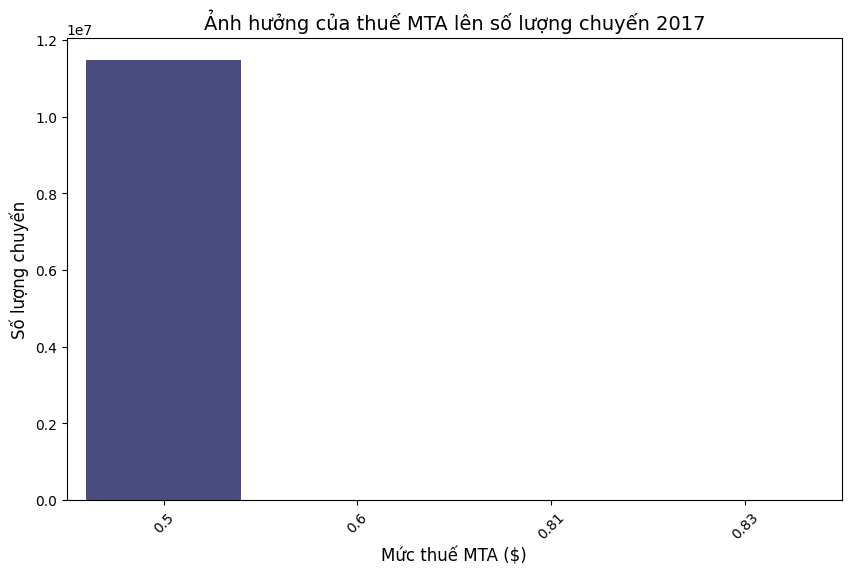

Trung bình số chuyến với thuế MTA: 0.5000001167002296
Số lượng chuyến không có thuế MTA: 233200
Số chuyến có thuế cao (>= 0.5): 11482411
Số chuyến có thuế thấp (< 0.5): 258256


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/taxi_trips/2017_taxi_trips.csv'
df = pd.read_csv(file_path)

df_non_zero_mta = df[df['mta_tax'] > 0]

mta_tax_distribution = df_non_zero_mta.groupby('mta_tax').size().reset_index(name='trip_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=mta_tax_distribution, x='mta_tax', y='trip_count', palette='viridis')
plt.title('Ảnh hưởng của thuế MTA lên số lượng chuyến 2017', fontsize=14)
plt.xlabel('Mức thuế MTA ($)', fontsize=12)
plt.ylabel('Số lượng chuyến', fontsize=12)
plt.xticks(rotation=45)
plt.show()

average_trips_with_tax = df_non_zero_mta['mta_tax'].mean()
trips_without_tax = df[df['mta_tax'] == 0].shape[0]
print(f"Trung bình số chuyến với thuế MTA: {average_trips_with_tax}")
print(f"Số lượng chuyến không có thuế MTA: {trips_without_tax}")

high_tax_threshold = df['mta_tax'].quantile(0.75)
df_high_tax = df[df['mta_tax'] >= high_tax_threshold]
df_low_tax = df[df['mta_tax'] < high_tax_threshold]

print(f"Số chuyến có thuế cao (>= {high_tax_threshold}): {df_high_tax.shape[0]}")
print(f"Số chuyến có thuế thấp (< {high_tax_threshold}): {df_low_tax.shape[0]}")

<ipython-input-1-257aa2052aff>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mta_tax_distribution, x='mta_tax', y='trip_count', palette='viridis')


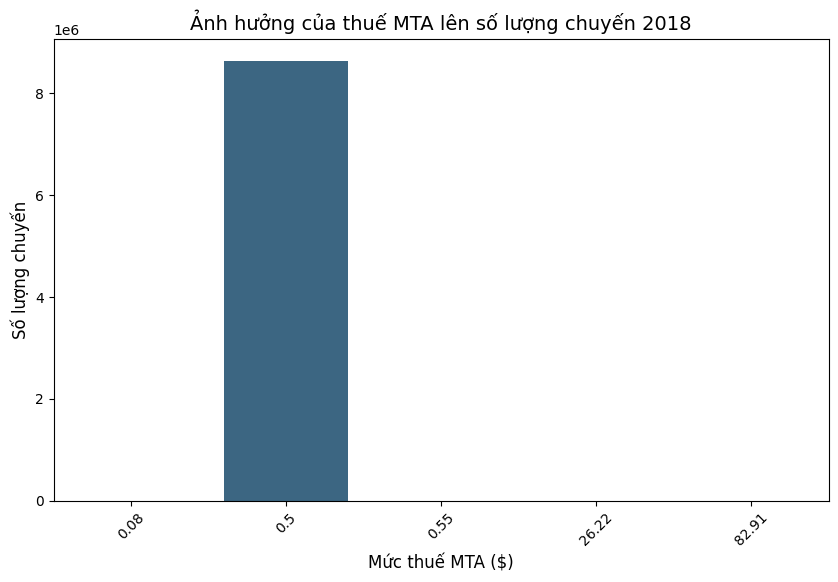

Trung bình số chuyến với thuế MTA: 0.500012453112653
Số lượng chuyến không có thuế MTA: 149492
Số chuyến có thuế cao (>= 0.5): 8635590
Số chuyến có thuế thấp (< 0.5): 171713


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/taxi_trips/2018_taxi_trips.csv'
df = pd.read_csv(file_path)

df_non_zero_mta = df[df['mta_tax'] > 0]

mta_tax_distribution = df_non_zero_mta.groupby('mta_tax').size().reset_index(name='trip_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=mta_tax_distribution, x='mta_tax', y='trip_count', palette='viridis')
plt.title('Ảnh hưởng của thuế MTA lên số lượng chuyến 2018', fontsize=14)
plt.xlabel('Mức thuế MTA ($)', fontsize=12)
plt.ylabel('Số lượng chuyến', fontsize=12)
plt.xticks(rotation=45)
plt.show()

average_trips_with_tax = df_non_zero_mta['mta_tax'].mean()
trips_without_tax = df[df['mta_tax'] == 0].shape[0]
print(f"Trung bình số chuyến với thuế MTA: {average_trips_with_tax}")
print(f"Số lượng chuyến không có thuế MTA: {trips_without_tax}")

high_tax_threshold = df['mta_tax'].quantile(0.75)
df_high_tax = df[df['mta_tax'] >= high_tax_threshold]
df_low_tax = df[df['mta_tax'] < high_tax_threshold]

print(f"Số chuyến có thuế cao (>= {high_tax_threshold}): {df_high_tax.shape[0]}")
print(f"Số chuyến có thuế thấp (< {high_tax_threshold}): {df_low_tax.shape[0]}")

<ipython-input-7-696d581f7851>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-7-696d581f7851>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mta_tax_distribution, x='mta_tax', y='trip_count', palette='viridis')


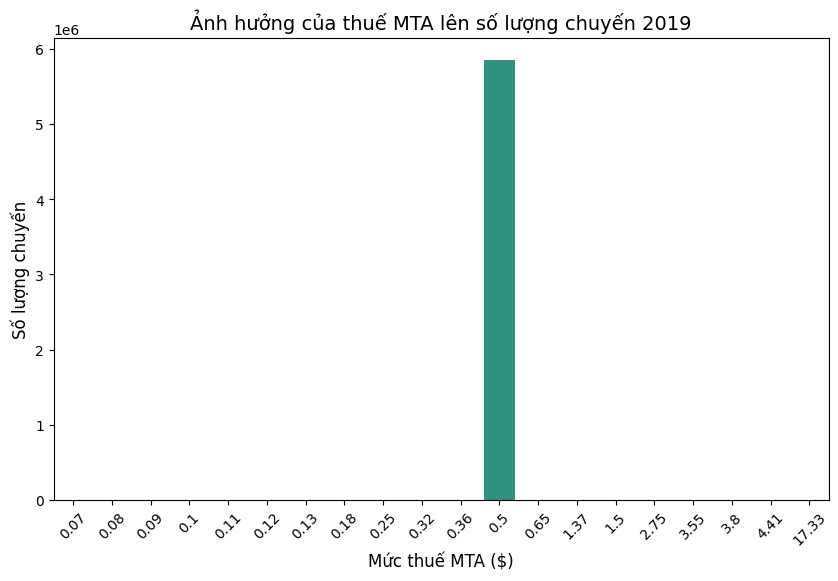

Trung bình số chuyến với thuế MTA: 0.5000202522274717
Số lượng chuyến không có thuế MTA: 174122
Số chuyến có thuế cao (>= 0.5): 5851673
Số chuyến có thuế thấp (< 0.5): 192377


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/taxi_trips/2019_taxi_trips.csv'
df = pd.read_csv(file_path)

df_non_zero_mta = df[df['mta_tax'] > 0]

mta_tax_distribution = df_non_zero_mta.groupby('mta_tax').size().reset_index(name='trip_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=mta_tax_distribution, x='mta_tax', y='trip_count', palette='viridis')
plt.title('Ảnh hưởng của thuế MTA lên số lượng chuyến 2019', fontsize=14)
plt.xlabel('Mức thuế MTA ($)', fontsize=12)
plt.ylabel('Số lượng chuyến', fontsize=12)
plt.xticks(rotation=45)
plt.show()

average_trips_with_tax = df_non_zero_mta['mta_tax'].mean()
trips_without_tax = df[df['mta_tax'] == 0].shape[0]
print(f"Trung bình số chuyến với thuế MTA: {average_trips_with_tax}")
print(f"Số lượng chuyến không có thuế MTA: {trips_without_tax}")

high_tax_threshold = df['mta_tax'].quantile(0.75)
df_high_tax = df[df['mta_tax'] >= high_tax_threshold]
df_low_tax = df[df['mta_tax'] < high_tax_threshold]

print(f"Số chuyến có thuế cao (>= {high_tax_threshold}): {df_high_tax.shape[0]}")
print(f"Số chuyến có thuế thấp (< {high_tax_threshold}): {df_low_tax.shape[0]}")


<ipython-input-8-6f21743c3044>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-8-6f21743c3044>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mta_tax_distribution, x='mta_tax', y='trip_count', palette='viridis')


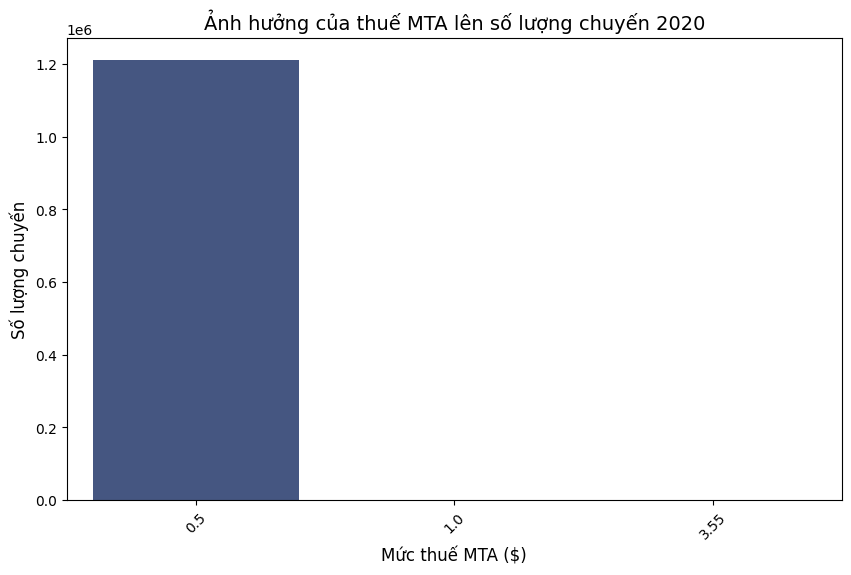

Trung bình số chuyến với thuế MTA: 0.5000230800609743
Số lượng chuyến không có thuế MTA: 519061
Số chuyến có thuế cao (>= 0.5): 1211002
Số chuyến có thuế thấp (< 0.5): 523049


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/taxi_trips/2020_taxi_trips.csv'
df = pd.read_csv(file_path)

df_non_zero_mta = df[df['mta_tax'] > 0]

mta_tax_distribution = df_non_zero_mta.groupby('mta_tax').size().reset_index(name='trip_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=mta_tax_distribution, x='mta_tax', y='trip_count', palette='viridis')
plt.title('Ảnh hưởng của thuế MTA lên số lượng chuyến 2020', fontsize=14)
plt.xlabel('Mức thuế MTA ($)', fontsize=12)
plt.ylabel('Số lượng chuyến', fontsize=12)
plt.xticks(rotation=45)
plt.show()

average_trips_with_tax = df_non_zero_mta['mta_tax'].mean()
trips_without_tax = df[df['mta_tax'] == 0].shape[0]
print(f"Trung bình số chuyến với thuế MTA: {average_trips_with_tax}")
print(f"Số lượng chuyến không có thuế MTA: {trips_without_tax}")

high_tax_threshold = df['mta_tax'].quantile(0.75)
df_high_tax = df[df['mta_tax'] >= high_tax_threshold]
df_low_tax = df[df['mta_tax'] < high_tax_threshold]

print(f"Số chuyến có thuế cao (>= {high_tax_threshold}): {df_high_tax.shape[0]}")
print(f"Số chuyến có thuế thấp (< {high_tax_threshold}): {df_low_tax.shape[0]}")


- Phần lớn các chuyến xe có mức thuế MTA là $0.5
- Mức thuế MTA dường như không ảnh hưởng nhiều đến số lượng chuyến đi vì hầu hết các chuyến đều có cùng một mức thuế chuẩn

*2. Phân tích tương quan giữa quãng đường và tiền tip*





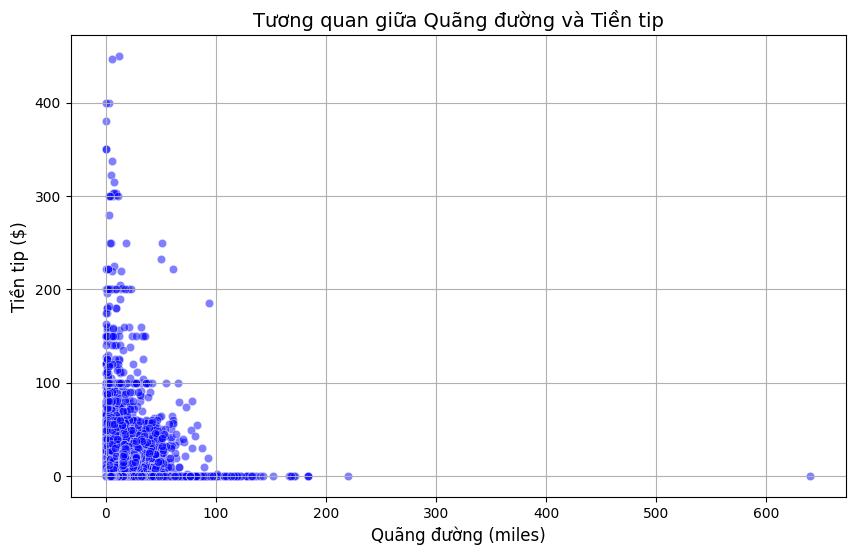

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/taxi_trips/2017_taxi_trips.csv'
df = pd.read_csv(file_path)

df_filtered = df[(df['trip_distance'] > 0) & (df['tip_amount'] >= 0)]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='tip_amount', alpha=0.5, color='blue')
plt.title('Tương quan giữa Quãng đường và Tiền tip 2017', fontsize=14)
plt.xlabel('Quãng đường (miles)', fontsize=12)
plt.ylabel('Tiền tip ($)', fontsize=12)
plt.grid(True)
plt.show()


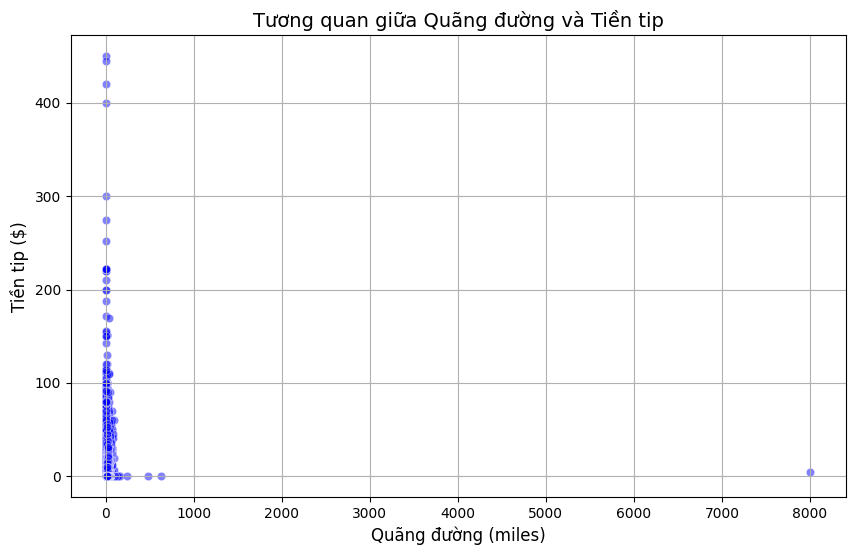

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/taxi_trips/2018_taxi_trips.csv'
df = pd.read_csv(file_path)

df_filtered = df[(df['trip_distance'] > 0) & (df['tip_amount'] >= 0)]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='tip_amount', alpha=0.5, color='blue')
plt.title('Tương quan giữa Quãng đường và Tiền tip 2018', fontsize=14)
plt.xlabel('Quãng đường (miles)', fontsize=12)
plt.ylabel('Tiền tip ($)', fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-5-7c4bbb05ebf0>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


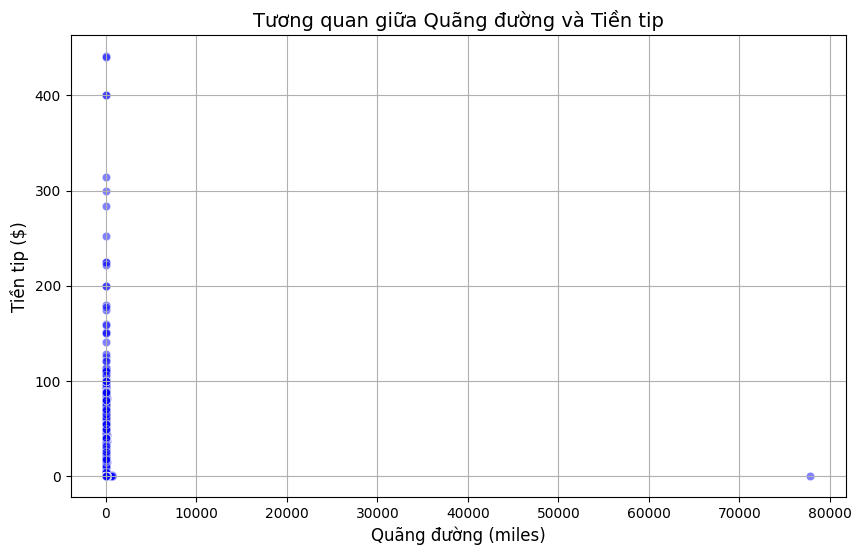

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/taxi_trips/2019_taxi_trips.csv'
df = pd.read_csv(file_path)

df_filtered = df[(df['trip_distance'] > 0) & (df['tip_amount'] >= 0)]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='tip_amount', alpha=0.5, color='blue')
plt.title('Tương quan giữa Quãng đường và Tiền tip 2019', fontsize=14)
plt.xlabel('Quãng đường (miles)', fontsize=12)
plt.ylabel('Tiền tip ($)', fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-6-c5982a6f0d79>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


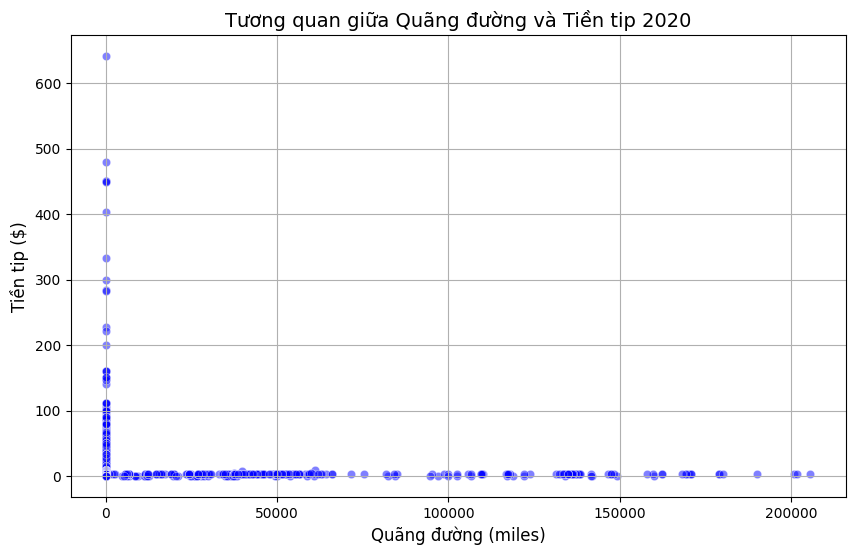

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/taxi_trips/2020_taxi_trips.csv'
df = pd.read_csv(file_path)

df_filtered = df[(df['trip_distance'] > 0) & (df['tip_amount'] >= 0)]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='tip_amount', alpha=0.5, color='blue')
plt.title('Tương quan giữa Quãng đường và Tiền tip 2020', fontsize=14)
plt.xlabel('Quãng đường (miles)', fontsize=12)
plt.ylabel('Tiền tip ($)', fontsize=12)
plt.grid(True)
plt.show()


Dựa vào biểu đồ chúng ta có thể thấy quãng đường càng gần tiền tip càng cao.